In [1]:
# import the library
import pandas as pd

# Q.1

In [2]:
df = pd.read_csv('chefmozaccepts.csv') # read the required dataset
df # display the data

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards
...,...,...
1309,132012,Diners_Club
1310,132002,MasterCard-Eurocard
1311,132002,Visa
1312,132002,American_Express


In [3]:
len(df[df['Rpayment'] == 'cash']) # number of restaurants that allow cash payment.

500

In [4]:
len(df[df['Rpayment'] == 'VISA']) # number of restaurants that allow Visa payment

172

In [5]:
# number of restaurants that allow Visa as well as cash payment
len(df[(df['Rpayment']=='cash') | (df['Rpayment']=='VISA')].groupby('placeID').filter(lambda x: len(x) > 1)['placeID'].unique())

166

# Q.2

In [6]:
df = pd.read_csv('chefmozcuisine.csv')
df

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food
...,...,...
911,132005,Seafood
912,132004,Seafood
913,132003,International
914,132002,Seafood


In [7]:
print(df['Rcuisine'].unique()) # unique cuisine types

['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


# Q.3

In [8]:
d=df[(df['Rcuisine']=='Mexican') | (df['Rcuisine']=='Bar')]
k = d.groupby('placeID').filter(lambda x: len(x) > 1)
k

,placeID,Rcuisine
95,135020,Bar
96,135020,Mexican
100,135007,Bar
102,135007,Mexican
257,132867,Bar
258,132867,Mexican


In [9]:
k['placeID'].unique() # restaurants placeID that serve both Mexican and bar cuisines.

array([135020, 135007, 132867], dtype=int64)

# Q.4

In [10]:
df = pd.read_csv('chefmozhours4.csv')

# count of restaurants that are open either Saturday or Sunday for 24 hours.
len(df[(df['hours']=='00:00-00:00;') & ((df['days']=='Sat;') | (df['days']=='Sun;'))]['placeID'].unique())

53

# Q.5

In [11]:
df = pd.read_csv('chefmozparking.csv')
# count of restaurants that do not provide parking facilities for their customers
len(df[df['parking_lot']=='none'])

348

# Q.6

In [12]:
df = pd.read_csv('geoplaces2.csv')

# restaurants that do not server alcohol, that do not provide smoking areas, and that have a casual dress code
list(df[(df['alcohol']=='No_Alcohol_Served') & (df['smoking_area']=='none') & (df['dress_code']=='casual')]['name'])[0]

'Taqueria EL amigo '

# Q.7

In [13]:
df = pd.read_csv('rating_final.csv')

# count of the best restaurants based on user ratings (rated 2 in all categories)
df = df[(df.rating == 2) & (df.food_rating == 2) & (df.service_rating == 2)]
len(df)

293

# Q.8

In [14]:
df = pd.read_csv('rating_final.csv')
df[(df.rating == 0)][['userID','placeID']].groupby(['userID','placeID']).filter(lambda x: len(x) > 1)

,userID,placeID


- There is no such user

# Q.9

In [15]:
df = pd.read_csv('usercuisine.csv')

In [16]:
y=df.groupby('userID').filter(lambda x: len(x) >10)
# cuisine names for each customer who preferred more than 10 cuisines.
y.groupby('userID')['Rcuisine'].apply(lambda grp: list(grp.value_counts().index)).to_dict()

{'U1016': ['Cafe-Coffee_Shop',
  'Fusion',
  'Indian-Pakistani',
  'Moroccan',
  'American',
  'Portuguese',
  'Eastern_European',
  'Regional',
  'Japanese',
  'Contemporary',
  'Barbecue',
  'Polynesian',
  'Lebanese',
  'Polish'],
 'U1060': ['Juice',
  'American',
  'Tex-Mex',
  'Burgers',
  'Mexican',
  'Cafeteria',
  'Fast_Food',
  'Soup',
  'Hot_Dogs',
  'Pizzeria',
  'Cafe-Coffee_Shop',
  'Spanish',
  'Italian'],
 'U1101': ['Hot_Dogs',
  'Latin_American',
  'Diner',
  'Contemporary',
  'Doughnuts',
  'Family',
  'Burgers',
  'Bar',
  'Mexican',
  'Italian',
  'Chinese',
  'Cafeteria',
  'Australian',
  'Cafe-Coffee_Shop',
  'Afghan'],
 'U1108': ['Dessert-Ice_Cream',
  'Deli-Sandwiches',
  'Sushi',
  'Cafe-Coffee_Shop',
  'Pizzeria',
  'Hot_Dogs',
  'Seafood',
  'Fast_Food',
  'Chinese',
  'Cafeteria',
  'Mexican',
  'Family',
  'Burgers',
  'Latin_American',
  'Japanese',
  'American',
  'Asian',
  'Game'],
 'U1135': ['Mediterranean',
  'Bar_Pub_Brewery',
  'Burgers',
  'Doughnu

# Q.10

In [17]:
df = pd.read_csv('userprofile.csv')
df1 = df[['smoker','weight','height']]

# average weight and height for smokers
df1[df1['smoker']=='true'].mean()

weight    71.269231
height     1.726538
dtype: float64

In [18]:
# average weight and height for nonsmokers
df1[df1['smoker']=='false'].mean()

weight    64.027523
height     1.666330
dtype: float64

# Q.11

In [19]:
df2 = pd.read_csv('rating_final.csv')
df = pd.read_csv('userprofile.csv')
indx = list(df2['userID'].value_counts()[:4].index)

# birth years for the customers who visited restaurants the most
df.loc[df['userID'].isin(indx)][['userID','birth_year']]

,userID,birth_year
23,U1024,1930
60,U1061,1990
105,U1106,1930
133,U1134,1991


# Q.12

In [20]:
df2 = pd.read_csv('rating_final.csv')
dd=df2[df2.rating==2].groupby('placeID')['userID'].count().reset_index()
dd = dd.sort_values('userID', ascending=False).reset_index(drop=True)[:9]
dd.columns = ['placeID','No of rating']

In [21]:
dd # top 9 restaurants based on the number of high user ratings

,placeID,No of rating
0,135085,18
1,132825,15
2,135052,14
3,135032,12
4,135025,11
5,135062,10
6,135075,10
7,132862,10
8,135038,10


# Q.13

In [22]:
df = pd.read_csv('geoplaces2.csv')
t=df['smoking_area'].value_counts()
y = list(t) 
x = list(t.index)

In [23]:
x

['none', 'not permitted', 'section', 'permitted', 'only at bar']

In [24]:
y

[70, 25, 24, 9, 2]

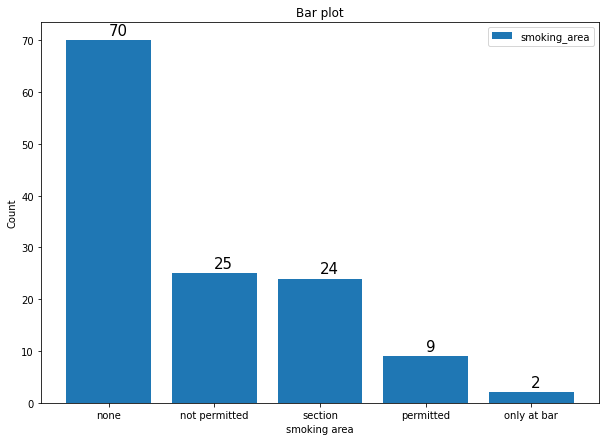

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize =(10, 7))
plt.title('Bar plot')
# Bar Plot
plt.bar(x,y,label='smoking_area')
plt.xlabel('smoking area')
plt.ylabel('Count')
plt.legend()

# print count on bar chart
for index, data in enumerate(list(t)):
    plt.text(x=index , y =data+1 , s=f"{data}",fontdict=dict(fontsize=15))
# Show Plot
plt.show()

# Q.14

In [26]:
df = pd.read_csv('userprofile.csv')
g = df['drink_level'].value_counts()
x = list(g.index)
y = list(g)

In [27]:
x

['abstemious', 'casual drinker', 'social drinker']

In [28]:
y

[51, 47, 40]

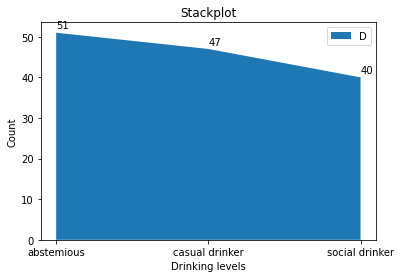

In [29]:
plt.stackplot(x,y)
plt.xlabel('Drinking levels')
plt.ylabel('Count')
  
plt.title('Stackplot')
plt.legend(labels='Drinking levels')

for index, data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}",fontdict=dict(fontsize=10))

plt.show()

# Q.15

In [30]:
df = pd.read_csv('userprofile.csv')
df1 = df[df.birth_year>1900] # user born after 1900 
df2 = pd.read_csv('rating_final.csv')
ff=pd.merge(df1,df2, how='inner', on=['userID'])[['userID','rating','color']]
data = ff.groupby('color').agg(['min', 'max','mean'])
data

rating              
          min max      mean
color                      
black       0   2  1.226190
blue        0   2  1.358586
green       0   2  1.077922
orange      0   2  1.222222
purple      0   2  0.780220
red         0   2  1.338983
white       0   2  1.029703
yellow      0   2  1.103774

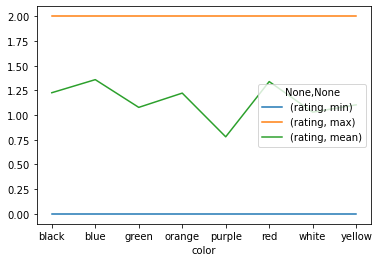

In [31]:
data.plot()
plt.show()